## Calculate regional mean transit times for each transit time map in the dataset
These will be used to filter which time points to look at in the time series analysis as we are only interested in PLDs > ATT. Anterior cingulate cortex, insular cortex, caudate, and putamen all show short transit times, making them good regions to maximize the number of data points we have to use. 

In [8]:
import os
import sys
import pandas as pd
import subprocess

local_dir = '../data/subjects'
roi_dir = '../rois'
hocpal = os.path.join(roi_dir, 'hocpal.nii.gz')
hospa = os.path.join(roi_dir, 'hospa.nii.gz')
gm_mask = os.path.join(roi_dir,'gm_resample_thr.nii.gz')

In [9]:
def refine_list(lst):
    '''
    creates a usable list of floats from the fsl output string

    :param lst: fsl output string
    :return: list of floats
    
    '''
    result_list = str(lst).split('\\n')
    result_list[0] = result_list[0].replace("b'", "")
    result_list.pop()
    result_list = [float(e) for e in result_list]
    
    return(result_list)
    

In [10]:
cols = ['session_id', 'gray_matter', 'acc', 'insula', 'caudate', 'putamen', ]
df = pd.DataFrame(columns=cols)
for root, dirs, files in os.walk(local_dir, topdown=False):
    tt_maps = [f for f in files if 'MNI152_tt' in f]
    if len(tt_maps) > 0:
        for tt_map in tt_maps:
            tt_map_path = os.path.join(root, tt_map)
            cmd1="fslstats -K '{}' '{}' -M".format(hocpal, tt_map_path)
            result1 = subprocess.check_output(cmd1, shell=True)
            cmd2="fslstats -K '{}' '{}' -M".format(hospa, tt_map_path)
            result2 = subprocess.check_output(cmd2, shell=True)
            cmd3="fslstats '{}' -k '{}' -M".format(tt_map_path, gm_mask)
            result3 = subprocess.check_output(cmd3, shell=True)
           
            # refine list
            result_list1 = refine_list(result1)
            result_list2 = refine_list(result2)
            # convert bytes-> str w no non-numeric or decimal points->float
            s = str(result3)
            s = ''.join(i for i in s if i.isdigit() or i=='.')
            result3=float(s)
            
            gray_matter = result3
            acc = result_list1[56]
            insula = result_list1[2]
            caudate = result_list2[4]
            putamen = result_list2[5]
                        
            # get session name from file name
            ses_name = tt_map.split('_MNI152')[0]
            
            df.loc[len(df.index)] = [ses_name, gray_matter, acc, insula, caudate, putamen]

df.head()

,session_id,gray_matter,acc,insula,caudate,putamen
0,sub-HC015_ses-MR_FOLLOWUP,1189.845716,1062.073268,1047.142680,989.255961,1049.536358
1,sub-HC025_ses-MR_BASELINE,1209.435160,1217.016027,1058.664452,1065.584065,1121.588977
2,sub-HC025_ses-MR_FOLLOWUP,1227.609265,1123.865484,1065.000000,1043.457627,1063.916307
3,sub-HC005_ses-MR_BASELINE,1375.356040,1185.721077,1175.296053,1164.009155,1197.920895
4,sub-HC005_ses-MR_FOLLOWUP,1425.554469,1208.497709,1202.026904,1187.726095,1257.618921


In [11]:
df.to_csv('regionals_tts.csv', index=False)

In [12]:
df

,session_id,gray_matter,acc,insula,caudate,putamen
0,sub-HC015_ses-MR_FOLLOWUP,1189.845716,1062.073268,1047.142680,989.255961,1049.536358
1,sub-HC025_ses-MR_BASELINE,1209.435160,1217.016027,1058.664452,1065.584065,1121.588977
2,sub-HC025_ses-MR_FOLLOWUP,1227.609265,1123.865484,1065.000000,1043.457627,1063.916307
3,sub-HC005_ses-MR_BASELINE,1375.356040,1185.721077,1175.296053,1164.009155,1197.920895
4,sub-HC005_ses-MR_FOLLOWUP,1425.554469,1208.497709,1202.026904,1187.726095,1257.618921
5,sub-HC028_ses-MR_FOLLOWUP,1471.643128,1238.825415,1179.403887,1291.568613,1317.900940
6,sub-HC028_ses-MR_BASELINE,1626.938207,1306.537493,1285.688587,1396.362445,1450.389997
7,sub-HC004_ses-MR_FOLLOWUP,1765.863957,1443.726908,1533.890533,1480.267355,1624.468193
8,sub-HC004_ses-MR_BASELINE,1664.403096,1314.664948,1305.769359,1442.118227,1592.058372
9,sub-HC013_ses-MR_BASELINE,1374.649604,1208.216495,1112.136860,1108.277973,1206.402341


In [13]:
df.max()

session_id     sub-HC028_ses-MR_FOLLOWUP
gray_matter                  1793.280349
acc                          1885.564396
insula                       1533.890533
caudate                      1524.748148
putamen                      1624.468193
dtype: object

In [55]:
import flywheel
import numpy as np
fw = flywheel.Client()
project_id = '5e50277c6dea314fa72a7440'
project = fw.get(project_id)

# initialize target columns with NaNs
df['Hb'] = np.nan

sessions = [fw.get_session(x.id) for x in fw.get_project_sessions(project_id)]

for ses in sessions:
    subject = fw.get(ses.parents['subject'])
    session_id = "sub-{}_ses-{}".format(subject.label, ses.label) # NOTE this is not the Flywheel definition of 'id'

    if subject.info:
        hb = subject.info['Hb']
        df.loc[df['session_id']==session_id, 'Hb'] = hb

        
df.head()

,session_id,gray_matter,acc,insula,caudate,putamen,Hb
0,sub-HC015_ses-MR_FOLLOWUP,1189.845716,1062.073268,1047.142680,989.255961,1049.536358,14.8
1,sub-HC025_ses-MR_BASELINE,1209.435160,1217.016027,1058.664452,1065.584065,1121.588977,15.9
2,sub-HC025_ses-MR_FOLLOWUP,1227.609265,1123.865484,1065.000000,1043.457627,1063.916307,15.9
3,sub-HC005_ses-MR_BASELINE,1375.356040,1185.721077,1175.296053,1164.009155,1197.920895,12.2
4,sub-HC005_ses-MR_FOLLOWUP,1425.554469,1208.497709,1202.026904,1187.726095,1257.618921,12.2


In [18]:
df_sort = df.sort_values('Hb')
df_sort.head()

,session_id,gray_matter,acc,insula,caudate,putamen,Hb
19,sub-HC007_ses-MR_FOLLOWUP,1167.674891,1053.435031,979.733006,1006.812348,1045.169374,11.2
20,sub-HC007_ses-MR_BASELINE,1280.777069,1305.709788,1114.490229,1080.261571,1147.736406,11.2
14,sub-HC002_ses-MR_FOLLOWUP,1610.234110,1297.052783,1218.731822,1274.806475,1376.574634,12.1
13,sub-HC002_ses-MR_BASELINE,1020.711430,1035.053234,974.131732,908.840351,958.483914,12.1
3,sub-HC005_ses-MR_BASELINE,1375.356040,1185.721077,1175.296053,1164.009155,1197.920895,12.2


In [19]:
low_df = df_sort[0:20] # want lowest 10, but there are 2 sessions per subject
low_df.insert(loc=1, column='group',value=['low'] * 20)
high_df = df_sort[-20:]
high_df.insert(loc=1, column='group',value=['high'] * 20)

filt_df = high_df.append(low_df, ignore_index=True)
filt_df.head()

,session_id,group,gray_matter,acc,insula,caudate,putamen,Hb
0,sub-HC026_ses-MR_FOLLOWUP,high,1388.452827,1129.514647,1188.853351,1142.467057,1164.206228,15.6
1,sub-HC014_ses-MR_FOLLOWUP,high,1205.467146,1126.377790,1106.186873,1058.235129,1119.522002,15.6
2,sub-HC021_ses-MR_FOLLOWUP,high,1793.280349,1720.985109,1357.990079,1524.748148,1582.770427,15.7
3,sub-HC021_ses-MR_BASELINE,high,1674.458227,1885.564396,1374.394693,1427.298413,1495.891096,15.7
4,sub-HC013_ses-MR_FOLLOWUP,high,1266.151629,1182.459073,1054.050764,1050.450650,1143.679867,15.7


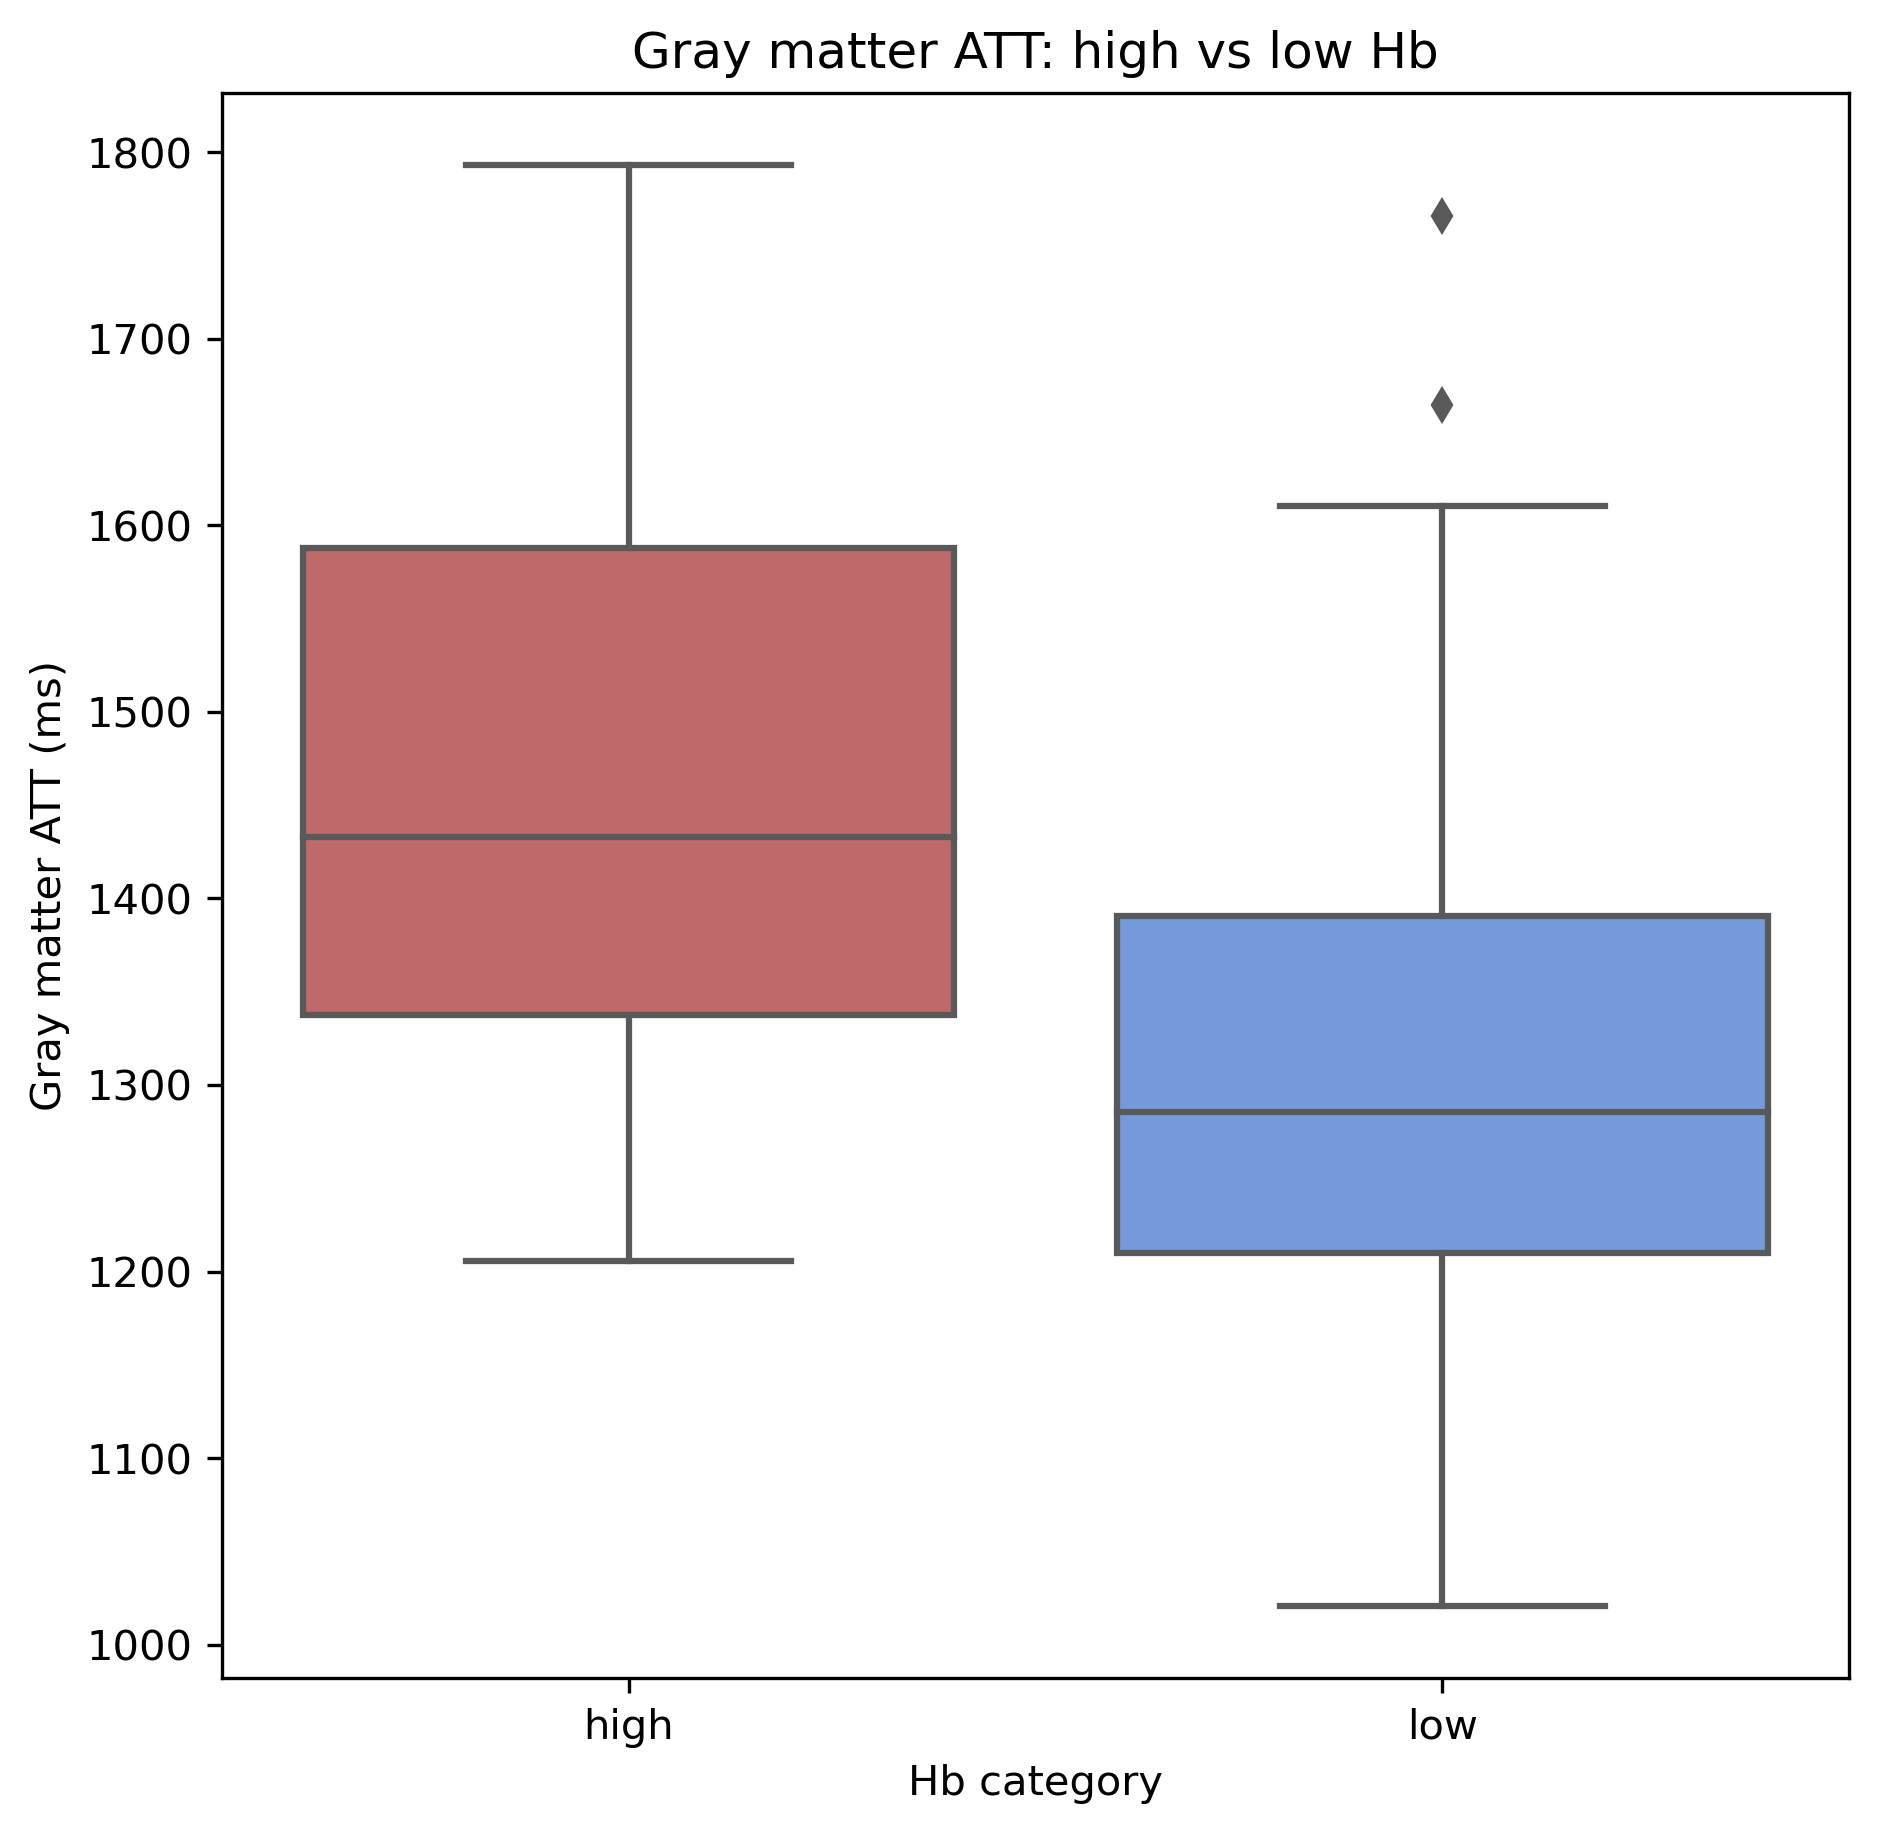

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

# set figure resolution
import matplotlib as mpl
dpi=300
mpl.rcParams['figure.dpi'] = dpi
mpl.rc("savefig", dpi=dpi)

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.boxplot(data=filt_df, y='gray_matter', x='group', palette=['indianred', 'cornflowerblue'])
ax.set_xlabel('Hb category')
ax.set_ylabel('Gray matter ATT (ms)')
# ax.set_xticks(['High Hb', 'Low Hb'])
plt.title("Gray matter ATT: high vs low Hb")

fname="../figs/ATT_vs_Hb.png"
plt.savefig(fname, facecolor='white', edgecolor='none')